In [11]:
from Bio.PDB.PDBParser import PDBParser
import numpy as np
import matplotlib.pyplot as plt

import nglview as nv

In [2]:
from pdbear import chirality, amide_bond 

In [70]:
parser = PDBParser()
struc = parser.get_structure("2", "./data/modelled/output.pdb")

In [71]:
residues = list(struc.get_residues())

In [325]:
res = residues[0]
res.resname

'GLN'

In [79]:
view = nv.show_biopython(res)
#view.display(gui=True)
view

NGLWidget()

In [74]:
def plot_system(aoi: dict[str, np.array]):
    fig = plt.figure()
    fig.set_size_inches(fig.get_size_inches()*2)
    ax = fig.add_subplot(projection="3d")

    for k, v in aoi.items():
        ax.scatter(*v, label=k, s=30)

    ax.legend()

In [75]:
aoi = {x.get_name(): x.coord for x in res.get_atoms() if x.get_name() in ["N", "CA", "C", "CB", "HA"]}#atoms_of_interest
aoi

{'N': array([-17.218,   8.405,  -2.709], dtype=float32),
 'CA': array([-15.793,   8.406,  -2.397], dtype=float32),
 'C': array([-15.299,   7.001,  -2.078], dtype=float32),
 'CB': array([-15.502,   9.342,  -1.221], dtype=float32),
 'HA': array([-15.249,   8.764,  -3.271], dtype=float32)}

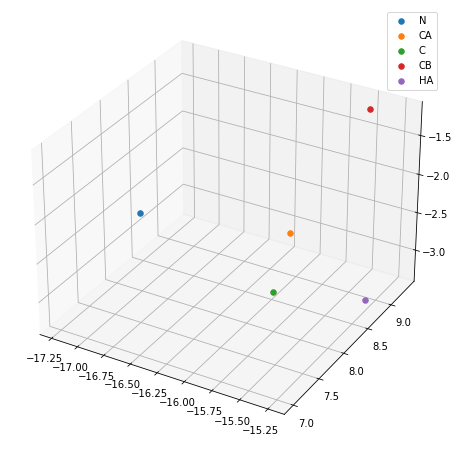

In [76]:
plot_system(aoi)

In [77]:
ca_original = aoi['CA'].copy()
for v in aoi.values():
    v -= ca_original
aoi

{'N': array([-1.4250002e+00, -1.0004044e-03, -3.1200004e-01], dtype=float32),
 'CA': array([0., 0., 0.], dtype=float32),
 'C': array([ 0.49400043, -1.4050002 ,  0.319     ], dtype=float32),
 'CB': array([0.29100037, 0.9359999 , 1.1760001 ], dtype=float32),
 'HA': array([ 0.5440006 ,  0.3579998 , -0.87399983], dtype=float32)}

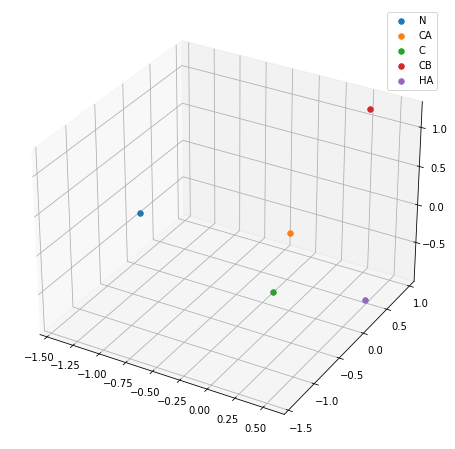

In [78]:
plot_system(aoi)

In [33]:
cr = chirality.get_chiralities(struc)
[(k, c) for k, (_, c) in cr.items() if c!='L']

[(8, 'None'),
 (15, 'None'),
 (16, 'D'),
 (17, 'D'),
 (19, 'D'),
 (21, 'D'),
 (23, 'D'),
 (25, 'D'),
 (26, 'None'),
 (42, 'None'),
 (45, 'D'),
 (47, 'D'),
 (48, 'D'),
 (49, 'None'),
 (50, 'D'),
 (51, 'D'),
 (52, 'D'),
 (53, 'D'),
 (54, 'None'),
 (56, 'None'),
 (64, 'D'),
 (68, 'D'),
 (69, 'D'),
 (70, 'D'),
 (71, 'D'),
 (72, 'D'),
 (73, 'D'),
 (74, 'D'),
 (75, 'D'),
 (90, 'D'),
 (91, 'D'),
 (93, 'D'),
 (94, 'D'),
 (95, 'D'),
 (96, 'D'),
 (100, 'D'),
 (102, 'D'),
 (105, 'D'),
 (106, 'D'),
 (110, 'D'),
 (112, 'None'),
 (114, 'None'),
 (122, 'D'),
 (123, 'D'),
 (131, 'D'),
 (132, 'D'),
 (135, 'D'),
 (137, 'D'),
 (138, 'None'),
 (149, 'D'),
 (150, 'D'),
 (151, 'D'),
 (153, 'D'),
 (155, 'D'),
 (160, 'D'),
 (162, 'D'),
 (164, 'D'),
 (165, 'D'),
 (166, 'D'),
 (167, 'D'),
 (169, 'None'),
 (170, 'D'),
 (181, 'D'),
 (182, 'D'),
 (183, 'D'),
 (184, 'D'),
 (185, 'None'),
 (192, 'None'),
 (194, 'None'),
 (196, 'None'),
 (199, 'D'),
 (201, 'D'),
 (203, 'D'),
 (205, 'D'),
 (207, 'D'),
 (208, 'D'),
 (2

In [ ]:
for residue in struc.get_residues():
    atoms = {atom.name : atom.coord for atom in residue.get_atoms()}
    h_vec = atoms['HA'] - atoms['CA']
    rot = chirality.get_rotator(h_vec)
    rotations = dict()
    xyz = list()
    for atom in ['N', 'C', 'CB']:
        rotated_xyz = rot @ (atoms[atom] - atoms['CA'])  
        xyz.append(rotated_xyz[:2])
        rotation = np.arctan2(rotated_xyz[1], rotated_xyz[0])                                
        rotations[atom] = rotation                                                           
        rotations[atom] -= rotations['N']                                                    
        rotations[atom] = np.mod(rotations[atom], 2*np.pi)
    print(residue)
    print(rotations)

<Residue ALA het=  resseq=1 icode= >
{'N': 0.0, 'C': 3.24610421951347, 'CB': 1.1051964463286155}
<Residue ALA het=  resseq=2 icode= >
{'N': 0.0, 'C': 2.2004831737343458, 'CB': 4.247073558666085}


In [9]:
h_vec = atoms['HA'] - atoms['CA']
rot = chirality.get_rotator(h_vec)

In [24]:
rotations = dict()
xyz = list()
for atom in ['N', 'C', 'CB']:
    rotated_xyz = rot @ (atoms[atom] - atoms['CA'])  
    xyz.append(rotated_xyz[:2])
    rotation = np.arctan2(rotated_xyz[1], rotated_xyz[0])                                
    rotations[atom] = rotation                                                           
    rotations[atom] -= rotations['N']                                                    
    rotations[atom] = np.mod(rotations[atom], 2*np.pi)   
rotations

{'N': 0.0, 'C': 2.2004831737343458, 'CB': 4.247073558666085}

In [25]:
xyz

[array([1.38616091, 0.1470135 ]),
 array([-0.84268907,  1.15653082]),
 array([-0.65124266, -1.29707261])]

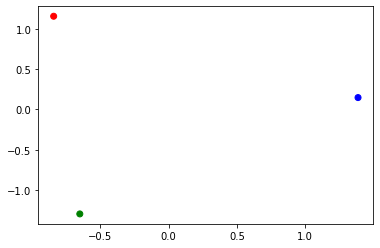

In [26]:
plt.scatter(*zip(*xyz), c=['b', 'r', 'g'])

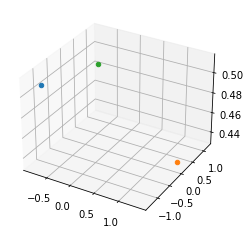

In [32]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')



ax.scatter(*(rot @ (atoms['CB'] - atoms['CA'])))
ax.scatter(*(rot @ (atoms['N'] - atoms['CA'])))
ax.scatter(*(rot @ (atoms['C'] - atoms['CA'])))

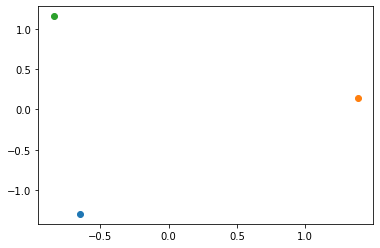

In [35]:
fig, ax = plt.subplots()
ax.scatter(*(rot @ (atoms['CB'] - atoms['CA']))[:2])
ax.scatter(*(rot @ (atoms['N'] - atoms['CA']))[:2])
ax.scatter(*(rot @ (atoms['C'] - atoms['CA']))[:2])

In [44]:
rotate_n = (rot @ (atoms['N'] - atoms['CA']))[:2]
rotate_c = (rot @ (atoms['C'] - atoms['CA']))[:2]
rotate_side = (rot @ (atoms['CB'] - atoms['CA']))[:2]

In [46]:
np.arctan2(rotate_n[1], rotate_n[0]), np.arctan2(rotate_c[1], rotate_c[0]), np.arctan2(rotate_side[1], rotate_side[0])

(0.1056630351269297, 2.2004831737343458, -2.036111748513501)

In [5]:
#r

In [6]:
r = amide_bond.get_stereo(struc)
n = 0
for k, (A, B, conf, phi) in r.items():
    if conf == "c":
        n += 1
        #print(f"{A} - {B}; {phi = :.3f}")
n

231

In [7]:
c, o = A.get_list()[2:4]

In [8]:
n, ca = B.get_list()[0:2]

In [9]:
u1 = c.coord - o.coord
u2 = n.coord - c.coord
u3 = ca.coord - n.coord

In [10]:
amide_bond.calc_angle(u1, u2, u3)

0.106072545

In [49]:
np.mod(9, 2*np.pi)

2.7168146928204138

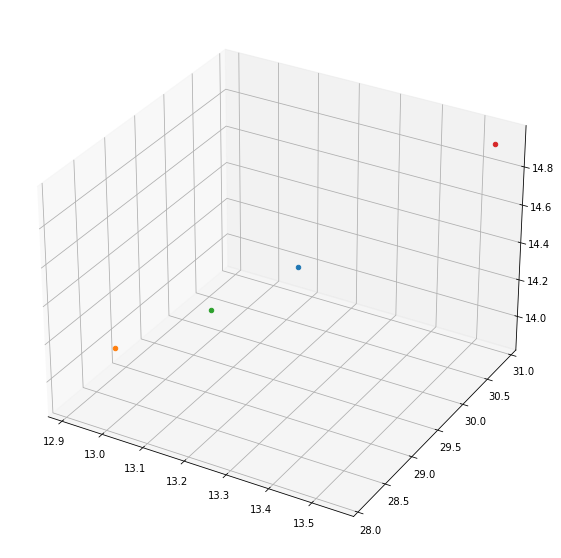

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(*o.coord)
ax.scatter(*c.coord)
ax.scatter(*n.coord)
ax.scatter(*ca.coord)

In [12]:
[x.coord for x in (c, o, n, ca)]

[array([12.912, 28.746, 13.996], dtype=float32),
 array([13.441, 28.126, 14.918], dtype=float32),
 array([12.965, 30.07 , 13.89 ], dtype=float32),
 array([13.549, 30.899, 14.937], dtype=float32)]

In [13]:
189/180 * np.pi

3.2986722862692828

In [14]:
o.get_parent().get_resname()

'ARG'

In [16]:
from Bio.PDB.Chain import Chain

In [17]:
c = Chain(0)
c

<Chain id=0>

In [18]:
c.add(A)
c.add(B)

In [288]:
view = nv.show_biopython(c)
view

NameError: name 'c' is not defined

In [81]:
from scipy.spatial.distance import cdist

In [125]:
x = [[10, 11, 12], [11,12,13]]
zp = [[10, 10, 10]]
y = cdist(x, x)

In [126]:
x2 = [[0,1,2], [1,2,3]]
y2 = cdist(x2, x2)

In [127]:
np.allclose(y, y2)

True

In [128]:
np.cross(*x)

array([-1,  2, -1])

In [129]:
np.cross(*x2)

array([-1,  2, -1])

In [130]:
2*np.prod(np.linalg.norm(x, axis=1))

796.0150752341315

In [132]:
np.linalg.norm(x, axis=1)

array([19.10497317, 20.83266666])

In [133]:
(np.linalg.norm(zp)**2 - np.sum(np.linalg.norm(x, axis=1)**2))/(2*np.prod(np.linalg.norm(x, axis=1)))

-0.6268725499366069

In [134]:
-1*np.sum(np.linalg.norm(x2, axis=1)**2)/(2*np.prod(np.linalg.norm(x2, axis=1)))

-1.135467178867674

In [115]:
np.linalg.norm([0,0,0])**2

0.0

In [124]:
np.append([zp],x, axis=1)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 2

In [146]:
from hypothesis import strategies as st
from hypothesis.extra import numpy

In [216]:
shape_strat = st.tuples(st.integers(min_value=1, max_value=10), st.integers(3,3))

numpy.arrays(np.float64, shape=shape_strat,  elements=st.floats(min_value=-10, max_value=10), fill=st.nothing()).example()

array([[-1.5       , -5.39655617,  3.12623024]])

In [224]:
zp = np.random.random_sample((1, 3))
zp

array([[0.62272291, 0.12221126, 0.59582074]])

In [229]:
np.array([[1,2,3]]) * np.linalg.inv(np.array([[1,2,3]]))

LinAlgError: Last 2 dimensions of the array must be square

In [330]:
res = residues[1]
res

<Residue ARG het=  resseq=2 icode= >

In [334]:
atoms = {atom.name : atom.coord.copy() for atom in res.get_atoms() if atom.name in {'CA', 'C', 'CB', 'N', 'HA'}}

In [336]:
ca_original = atoms['CA'].copy()
for v in atoms.values():
    v -= ca_original
atoms

{'N': array([-0.64400005,  1.263     , -0.3399999 ], dtype=float32),
 'CA': array([0., 0., 0.], dtype=float32),
 'C': array([0.5120001 , 0.01300001, 1.4350001 ], dtype=float32),
 'CB': array([ 1.1570005 , -0.283     , -0.94599986], dtype=float32),
 'HA': array([-0.7340002 , -0.8000002 , -0.09800005], dtype=float32)}

In [385]:
A = np.array([[0,0,1], np.random.random(3), [0,0,1]]).T
A

array([[0.        , 0.25671241, 0.        ],
       [0.        , 0.55944482, 0.        ],
       [1.        , 0.26629023, 1.        ]])

In [386]:
q, r = np.linalg.qr(A)

In [394]:
q, r = np.linalg.qr(np.array([[1,1,1],[0,1,0],[0,0,1]]).T)

In [396]:
q.T @ [1,1,1]

array([-1.73205081e+00,  0.00000000e+00, -2.22044605e-16])

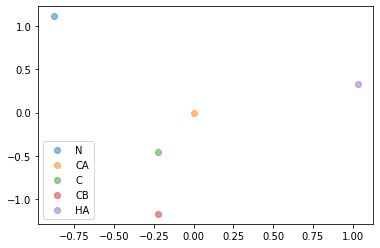

In [388]:
fig, ax = plt.subplots()

for atom, value in atoms.items():
    ax.scatter(*(q.T @ value)[1:], alpha=0.5, label=atom)
ax.legend()

In [342]:
q.T

array([[-6.73320840e-01, -7.33864645e-01, -8.98984430e-02],
       [ 7.27409786e-01, -6.79295726e-01,  9.71201296e-02],
       [-1.32340657e-01, -6.93889390e-18,  9.91204293e-01]])

In [340]:
q.T @ value

array([1.09011954e+00, 3.12250226e-17, 1.38777878e-17])

In [322]:
q[:,1:].T

array([[ 0.17356566, -0.94451882, -0.27885328],
       [ 0.84897882,  0.        ,  0.52842688]])

In [324]:
q.T[1:] @ value

array([5.55111512e-17, 1.11022302e-16])

In [347]:
np.sign([20, -1])

array([ 1, -1])

In [348]:
from hypothesis import assume

In [350]:
assume(np.any(vector))

True

In [351]:
np.any(np.array([0.,0.,0.]))

False

In [354]:
np.dot([0,0,1], [0,1,1])

1

In [398]:
type(res)

Bio.PDB.Residue.Residue

In [404]:
q.T[1:] @ atoms['N']

array([-1.4329515 ,  0.21496056])

In [408]:
list(reversed(q.T[1:] @ atoms['N']))

[0.21496055993574859, -1.4329514956348002]

In [410]:
np.arctan2(*reversed(q.T[1:] @ atoms['N']))

2.9926905331408635

In [411]:
atoms

{'N': array([-0.64400005,  1.263     , -0.3399999 ], dtype=float32),
 'CA': array([0., 0., 0.], dtype=float32),
 'C': array([0.5120001 , 0.01300001, 1.4350001 ], dtype=float32),
 'CB': array([ 1.1570005 , -0.283     , -0.94599986], dtype=float32),
 'HA': array([-0.7340002 , -0.8000002 , -0.09800005], dtype=float32)}

In [412]:
atoms.pop('CA')

array([0., 0., 0.], dtype=float32)

In [413]:
atoms

{'N': array([-0.64400005,  1.263     , -0.3399999 ], dtype=float32),
 'C': array([0.5120001 , 0.01300001, 1.4350001 ], dtype=float32),
 'CB': array([ 1.1570005 , -0.283     , -0.94599986], dtype=float32),
 'HA': array([-0.7340002 , -0.8000002 , -0.09800005], dtype=float32)}